In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

random_forest = RandomForestClassifier()
y_pred = cross_val_predict(random_forest, X, y, cv=kf)


In [4]:



print("Accuracy = ", accuracy_score(y, y_pred) * 100, "%")
print("Precision = ", precision_score(y, y_pred,average='micro'))
print("Recall = ", recall_score(y, y_pred,average='micro'))
print("F1-score = ", f1_score(y, y_pred,average='micro'))

confusion = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(confusion)


Accuracy =  94.02634054562559 %
Precision =  0.9402634054562559
Recall =  0.9402634054562559
F1-score =  0.9402634054562559
Confusion Matrix:
[[1624   24    7]
 [  69  220    6]
 [  10   11  155]]


In [5]:
from sklearn.metrics import classification_report
report = classification_report(y, y_pred)
print(report)


              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97      1655
         2.0       0.86      0.75      0.80       295
         3.0       0.92      0.88      0.90       176

    accuracy                           0.94      2126
   macro avg       0.91      0.87      0.89      2126
weighted avg       0.94      0.94      0.94      2126



In [6]:
# data set had negative value, using log transform to make positive and Adding 1 in X, to prevent log value as infinite
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_log_transformed = np.log1p(X + 1)

kbest = SelectKBest(score_func=chi2, k=5)
X_new = kbest.fit_transform(X_log_transformed, y)

feature_scores = kbest.scores_
print("Feature Importance Scores:")
print(feature_scores)

Feature Importance Scores:
[2.61919200e-01 1.77368755e-03 1.52940324e-02 5.36050691e-04
 3.95730127e-04 6.56463269e-08 8.59609816e-05 1.68957195e+01
 1.45339333e+01 5.29494011e+02 4.23579355e+01 1.72531418e+01
 3.22287127e+00 1.27957858e-02 5.13797999e+00 5.46795895e-01
 1.72059243e+00 1.58334943e+00 1.05026330e+00 1.21194002e+02
 1.18517227e+01]


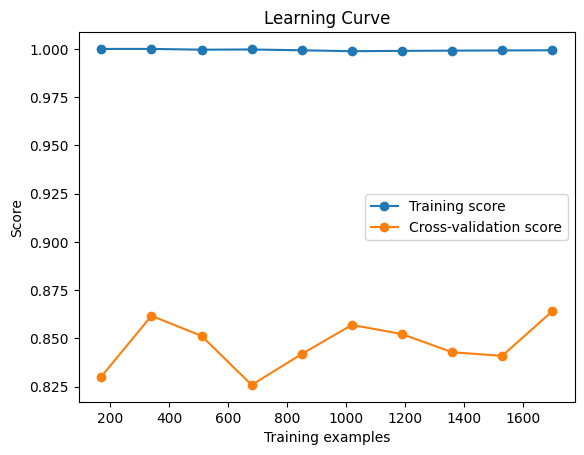

In [7]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(random_forest, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()